# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 22816 lines 248 participants


## Overall info about participants

In [2]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,StudyID
Main,224.0
Pilot,24.0




Different kinds of designers:


Training
StudyID Training                  
Main    Non-designer         118.0
        Graphic designer      45.0
        Letter designer       34.0
        Other designer        20.0
        Typographer            7.0
Pilot   Non-designer          16.0
        Letter designer        6.0
        Typographer            2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.762124,1.618244e-31,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.995694,0.035571,False


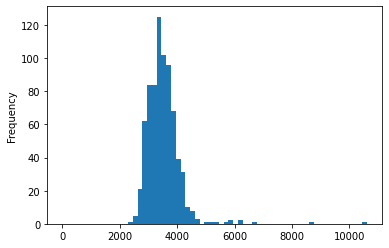

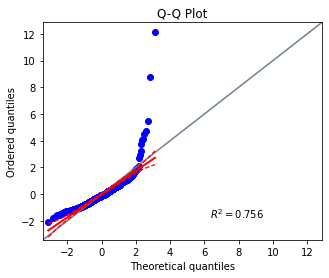

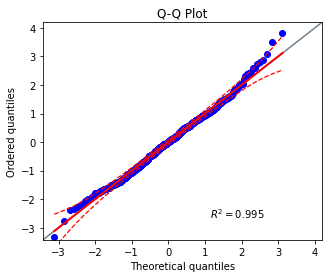

In [3]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")

,ParticipantID,Composite pair,Congruent pair,TestID,TrialID,Training,isDesigner,Correct,Correct (normalized),ET,RT,RT (normalized),Date,AUC,AUC (normalized),Type,Focus
StudyID,,,,,,,,,,,,,,,,,
Main,0,False,True,1,24,Non-designer,False,0.916667,2.879793,266.700000,3181.416667,8.056989,2022-06-17 13:55:27,0.986111,2.905341,Normal,None
Main,0,True,False,1,24,Non-designer,False,0.541667,1.701696,266.700000,3241.541667,8.067470,2022-06-17 13:55:27,0.600694,1.773572,Composite incongruent,None
Main,0,True,True,1,24,Non-designer,False,0.750000,2.356194,266.700000,3029.583333,8.009355,2022-06-17 13:55:27,0.687500,1.955193,Composite congruent,None
Main,1,False,True,1,24,Letter designer,True,0.916667,2.879793,188.900000,3447.458333,8.130679,2022-06-17 13:23:00,0.934028,2.622069,Normal,Letters
Main,1,True,False,1,24,Letter designer,True,0.791667,2.487094,188.900000,4357.375000,8.321411,2022-06-17 13:23:00,0.854167,2.357931,Composite incongruent,Letters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pilot,246,True,False,1,22,Non-designer,False,0.818182,2.570394,543.636364,2850.863636,7.948938,2022-05-23 18:01:23,NaN,NaN,Composite incongruent,None
Pilot,246,True,True,1,2,Non-designer,False,0.500000,1.570796,543.636364,2985.000000,7.996744,2022-05-23 18:01:23,NaN,NaN,Composite congruent,None
Pilot,247,False,False,1,9,Letter designer,True,0.777778,2.443461,568.181818,2934.333333,7.978502,2022-05-22 08:00:19,NaN,NaN,Normal,Letters


/var/folders/73/df1srj11131_3t4kwjv082_40000gn/T/ipykernel_59544/1945890159.py:30: FutureWarning: ['Date', 'Focus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Training         Type                                     
Graphic designer Composite congruent    2.145502  0.252184
                 Composite incongruent  2.073522  0.251553
                 Normal                 2.727446  0.304263
Letter designer  Composite congruent    2.288005  0.229246
                 Composite incongruent  2.208926  0.288177
                 Normal                 2.934254  0.270345
Non-designer     Composite congruent    2.058397  0.239330
                 Composite incongruent  1.891380  0.273867
                 Normal                 2.608813  0.339713
Other designer   Composite congruent    2.168068  0.196577
                 Composite incongruent  1.868145  0.406317
                 Normal                 2.743420  0.346763
Typographer      Composite congruent    2.249180  0.238303
                 Composite incongruent  2.251405  0.238263
                 Normal                 2.882868  0.222180

/var/folders/73/df1srj11131_3t4kwjv082_40000gn/T/ipykernel_59544/1945890159.py:36: FutureWarning: ['Training', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Focus        Type                                     
Letters      Composite congruent    2.281376  0.228240
             Composite incongruent  2.216179  0.278011
             Normal                 2.925481  0.260929
None         Composite congruent    2.058397  0.239330
             Composite incongruent  1.891380  0.273867
             Normal                 2.608813  0.339713
Other design Composite congruent    2.152445  0.235170
             Composite incongruent  2.010329  0.318813
             Normal                 2.732361  0.315276

<AxesSubplot:title={'center':'AUC (normalized)'}, xlabel='Focus,Type'>

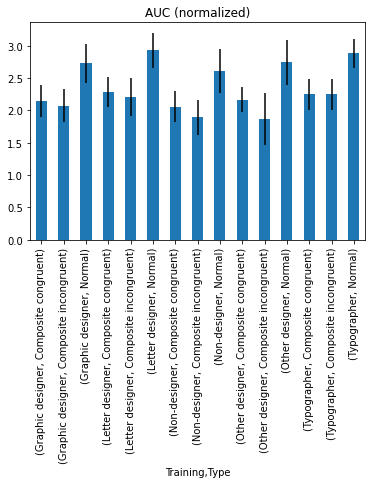

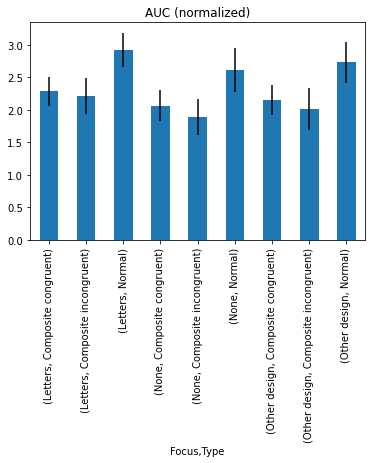

In [4]:
from copy import copy
# from scipy.stats import sem

agg["Type"] = "Normal"
conditions = [
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(True),
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(False),
]
choices = [
  "Composite congruent",
  "Composite incongruent"
]
agg["Type"] = np.select(conditions, choices, default="Normal")
conditions = [
  agg["Training"].eq("Other designer"),
  agg["Training"].eq("Graphic designer"),
  agg["Training"].eq("Typographer"),
  agg["Training"].eq("Letter designer"),
]
choices = [
  "Other design",
  "Other design",
  "Letters",
  "Letters",
]
agg["Focus"] = np.select(conditions, choices, default="None")

display(agg)

auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")

auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")
